In [277]:
import requests
import pandas as pd
import altair as alt
import json

In [265]:
url = "https://goverlytics.p.rapidapi.com/federal-legislation/ca"

gender_list = ["M", "F", "O"]

In [266]:
# Charaf's loading data functions
def load_data(limit, page, gender):

    querystring = {"include_summary":"true",
                   "include_text":"true",
                   "include_actions":"true",
                   "include_votes":"true",
                   "sponsor_gender": gender,
                   "limit": limit,
                   "page": page,
                  }

    headers = {
        'x-rapidapi-host': "goverlytics.p.rapidapi.com",
        'x-rapidapi-key': "4d08b76ec0msh553b06f36bc2c52p18a08ejsne688f7dc5de5"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response


def load_large_data(pages):
    list_df = []
    for page in range(pages):
        for gender in gender_list:
            list_df.append(pd.DataFrame(load_data(25, page, gender).json()["data"]))
            
    df = pd.concat(list_df, axis=0)
    print(df.shape)

    return df

In [267]:
federal_legislation_df = load_large_data(10)

(337, 38)


In [288]:
def add_bill_status(df):
    new_df = df[['last_major_event']].copy()
    new_df['last_major_event_status'] = 0
    new_df['last_major_event_year'] = 0
    
    for i, row in new_df.iterrows():
        new_df.loc[i, 'last_major_event_status'] = row['last_major_event']['status']
        new_df.loc[i, 'last_major_event_year'] = row['last_major_event']['date'][:4]
        
    return new_df

In [289]:
new_df = add_bill_status(federal_legislation_df)

In [290]:
new_df.head()

,last_major_event,last_major_event_status,last_major_event_year
0,"{'date': '2020-12-03', 'status': 'Introduction...",Introduction and First Reading,2021
1,"{'date': '2021-06-02', 'status': 'Second Readi...",Third Reading,2021
2,"{'date': '2021-03-24', 'status': 'Introduction...",Introduction and First Reading,2020
3,"{'date': '2021-06-17', 'status': 'Introduction...",Introduction and First Reading,2020
4,"{'date': '2021-05-25', 'status': 'Introduction...",Second Reading,2021


<AxesSubplot:xlabel='last_major_event_status'>

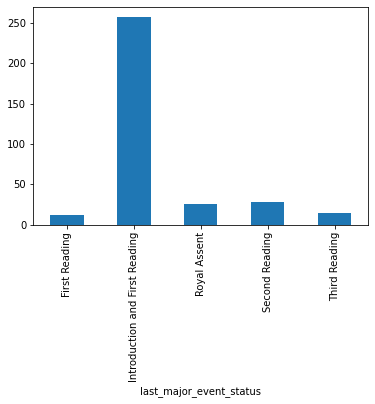

In [275]:
new_df.groupby('last_major_event_status').size().plot(kind='bar')

In [293]:
new_df.groupby('last_major_event_status').head()

,last_major_event,last_major_event_status,last_major_event_year
0,"{'date': '2020-12-03', 'status': 'Introduction...",Introduction and First Reading,2021
1,"{'date': '2021-06-02', 'status': 'Second Readi...",Third Reading,2021
2,"{'date': '2021-03-24', 'status': 'Introduction...",Introduction and First Reading,2020
3,"{'date': '2021-06-17', 'status': 'Introduction...",Introduction and First Reading,2020
4,"{'date': '2021-05-25', 'status': 'Introduction...",Second Reading,2021
5,"{'date': '2020-02-26', 'status': 'Introduction...",Introduction and First Reading,2020
6,"{'date': '2020-06-16', 'status': 'Introduction...",Introduction and First Reading,2020
10,"{'date': '2020-01-27', 'status': 'Introduction...",Royal Assent,2021
12,"{'date': '2020-02-18', 'status': 'Introduction...",Second Reading,2021
23,"{'date': '2020-07-27', 'status': 'Royal Assent...",First Reading,2021


In [312]:
alt.Chart(new_df).mark_bar().encode(
    y = 'last_major_event_status',
    x = 'count()',
    tooltip = 'count()'
    ).interactive()

alt.Chart(...)

In [ ]:
app = Dash(__name__)

df = load_large_data(10)


In [ ]:
app.layout = html.Div([
    html.H1("Status of Bills", style={'text-align': 'center'}),
    
    dcc.Graph(id='my_canada_map', figure={}),
    
    dcc.Graph(id='my_bar_plot', figure={})
])

def plot_altair(xcol, ycol):
    chart = alt.Chart(new_df).mark_bar().encode(
    y = 'last_major_event_status',
    x = 'count()',
    tooltip = 'count()'
    ).interactive()
    return chart.to_html()

if __name__ == '__main__':
    app.run_server(debug=True)

<AxesSubplot:ylabel='province_territory_id'>

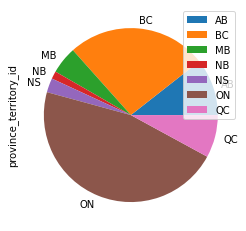

In [44]:
federal_legislators_df.groupby(['province_territory']).sum().plot(kind='pie', y='province_territory_id')

<AxesSubplot:ylabel='is_active'>

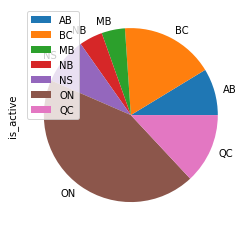

In [49]:
federal_legislators_df.groupby(['province_territory']).sum().plot(kind='pie', y='is_active')

Ideas:

- Check time it takes to get a bill to Royal Assent - see if topic affects this, because some bills are really fast
- percentage of bills that make it to Royal Assent
- percentage of bills that are currently in the process of getting to Royal Assent